# Office Indoor Air Quality Data Exploration
## by Sandijs Vasilevskis

## Investigation Overview

> Describe the overall goals of your presentation here.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid', 
              rc={'figure.figsize': (11.7,8.27), 
                  'xtick.major.size': 12, 'ytick.major.size': 12,
                  'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14})
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


Bad key "text.kerning_factor" on line 4 in
c:\programdata\anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


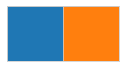

In [2]:
# Colors for plots
current_pallete =  sns.color_palette()
pallete = sns.color_palette().as_hex()

# Hex codes for BASELINE and MOBISTYLE colors
color_BL = '#1f77b4'
color_MS = '#ff7f0e'
color_other = '#2ca02c'
color_out = '#7f7f7f'
color_missing = 'lightgrey'

# Create dictionary pallete for Monitoring period
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

# Plot Colors for BASELINE and MOBISTYLE
sns.palplot([color_BL, color_MS])

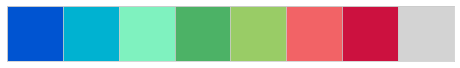

In [3]:
# Set bins and labels for Indoor environmental parameters
# The bin ranges ar based on an European building design standard DS/EN 15251:2007
bins_TEMP, bins_RH = [-10000, 19, 20, 21, 23, 24, 25, 10000], [-10000, 20, 25, 30, 50, 60, 70, 10000]
bins_CO2, bins_VOC = [-10000, 750, 900, 1200, 10000], [-10000, 40, 80, 100, 10000]

labels_T_RH = ['Cat -IV','Cat -III', 'Cat -II','Cat I', 'Cat +II','Cat +III','Cat +IV']
labels_CO2_VOC = ['Cat I', 'Cat II', 'Cat III', 'Cat IV']

# RGB codes for Comfort category colors
cmap_T_RH = [(0, .33, .82), (0, .7, .82), (.5, .95, .75), (.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']
cmap_CO2_VOC = [(.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']

# Plot diverging color pallete for Temperature and relative humidity categories
# Grey color for the missing data
sns.palplot(cmap_T_RH)

In [4]:
# load in the dataset into a pandas dataframe
# Assign categorical data types before reading CSV file
dtypes = {
    'Monitoring_Period': 'category',
    'Season': 'category',
    'Category_TEMP': 'category',
    'Category_RH': 'category',
    'Category_CO2': 'category',
    'Category_VOC': 'category',
}

# read CSV file
df = (pd.read_csv('./Files/office_air_quality_data.csv',                    
                    parse_dates=True,
                    dtype=dtypes,
                    index_col='Timestamp')
       )

# Filter the data, exclude the time outsied working hours
data = df.query('Room_Status == 1')

# Verify that all values are equal to 1 (Office room occupied)
assert data['Room_Status'].all() == 1

# Dataset was reduced by almost 2/3 after filtering
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21248 entries, 2018-02-01 08:15:00 to 2019-11-29 17:15:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Room_Status          21248 non-null  float64 
 1   Window_State         21248 non-null  float64 
 2   Window_State_Change  21243 non-null  float64 
 3   CO2                  18211 non-null  float64 
 4   RH                   18211 non-null  float64 
 5   VOC                  18211 non-null  float64 
 6   Temperature          21248 non-null  float64 
 7   Monitoring_Period    21248 non-null  category
 8   Season               21248 non-null  category
 9   Category_TEMP        21248 non-null  category
 10  Category_RH          18211 non-null  category
 11  Category_CO2         18211 non-null  category
 12  Category_VOC         18211 non-null  category
 13  Outdoor_Temperature  21248 non-null  float64 
 14  Outdoor_RH           21248 non-null

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Dataset Overview

Time series data:
* 2 years length
* 15 minutes timestamp

Investigate Indoor Air Quality parameters

Comparison of BASELINE and MOBISTYLE periods

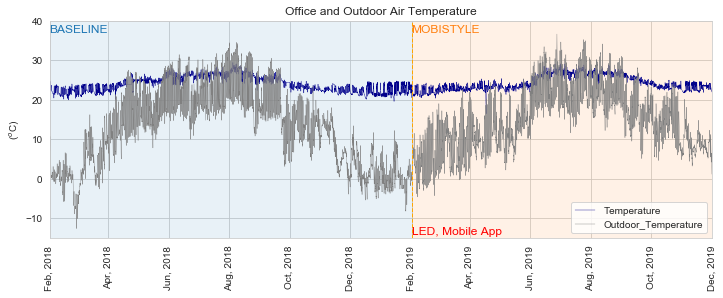

In [5]:
fig, ax = plt.subplots(figsize=(11.87, 4), sharex=True)

df.loc[:, ['Temperature', 'Outdoor_Temperature']].plot(title='Office and Outdoor Air Temperature', color=['darkblue', 'grey'],
                                                       linewidth=.4, ax=ax)
ax.axvline(x='02-01-2019', color='orange', linestyle='--', linewidth=1)
ax.fill_between(df.loc['02-01-2019':, :].index.values, -15, 40, facecolor=color_MS, alpha=0.1)
ax.fill_between(df.loc[:'02-01-2019', :].index.values, -15, 40, facecolor=color_BL, alpha=0.1)
ax.text(x='02-01-2019', y=-14, s='LED, Mobile App', color='red', size=12);
ax.text(x='02-01-2019', y=37, s='MOBISTYLE', color=color_MS, size=12);
ax.text(x='02-01-2018', y=37, s='BASELINE', color=color_BL, size=12);
ax.set(ylim=(-15,40), xticks=pd.date_range(start='2018-02-1', periods=12, freq='2MS'), xlabel='', ylabel='($^o$C)');
ax.set_xticklabels(pd.date_range(start='2018-02-1', periods=12, freq='2MS').strftime('%b, %Y'), rotation=90);

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21248 entries, 2018-02-01 08:15:00 to 2019-11-29 17:15:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Room_Status          21248 non-null  float64 
 1   Window_State         21248 non-null  float64 
 2   Window_State_Change  21243 non-null  float64 
 3   CO2                  18211 non-null  float64 
 4   RH                   18211 non-null  float64 
 5   VOC                  18211 non-null  float64 
 6   Temperature          21248 non-null  float64 
 7   Monitoring_Period    21248 non-null  category
 8   Season               21248 non-null  category
 9   Category_TEMP        21248 non-null  category
 10  Category_RH          18211 non-null  category
 11  Category_CO2         18211 non-null  category
 12  Category_VOC         18211 non-null  category
 13  Outdoor_Temperature  21248 non-null  float64 
 14  Outdoor_RH           21248 non-null

## Air Quality  data

### Correlation matrix

Strong correlation: 
* Window time open and Outdoor temperature
* Office temperature and Outdoor temperature, Global radiation
* CO2 and VOC levels

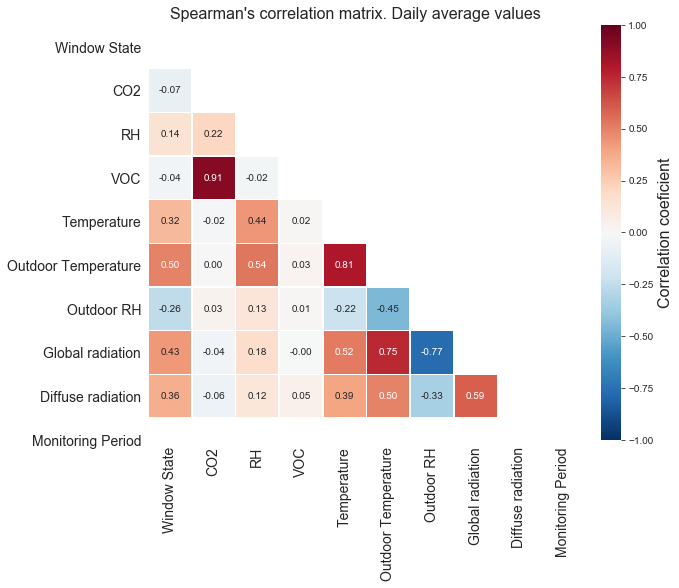

In [7]:
# Select numeric variables, calculate daily mean values and include window state column
df_daily = data.iloc[:, np.r_[1, 3:9, 13:17]].resample('D').mean().dropna(how='all')
df_daily.loc[:'2019-02-1', 'Monitoring_Period'] = 'BASELINE'
df_daily.loc['2019-02-1': , 'Monitoring_Period'] = 'MOBISTYLE'

# Plot only upper matrix
fig, ax = plt.subplots(figsize=(11.7, 8.27))
mask = np.zeros_like(df_daily.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True

# Format labels
labels = [col.replace('_', ' ') for col in df_daily.columns]

hm = sns.heatmap(df_daily.corr(method='spearman'), square=True,
                 cmap='RdBu_r', linewidths=.5, annot=True, fmt='.2f',
                 xticklabels=labels, yticklabels=labels,
                 mask=mask, vmax=1., vmin=-1., ax=ax);
hm.figure.axes[-1].set_ylabel('Correlation coeficient', size=16)
hm.tick_params(labelsize=14)
hm.set_title("Spearman's correlation matrix. Daily average values", fontsize=16)

plt.tight_layout()

## MOBISTYLE and BASELINE monitoring

During MOBISTYLE period employees:
* are given mobile app (with advices to open window)
* have LED lights installed in the office (signalling high CO2 levels)

## MOBISTYLE and BASELINE monitoring

### Indoor Air Quality

* Higher RH in spring during MOBISTYLE period


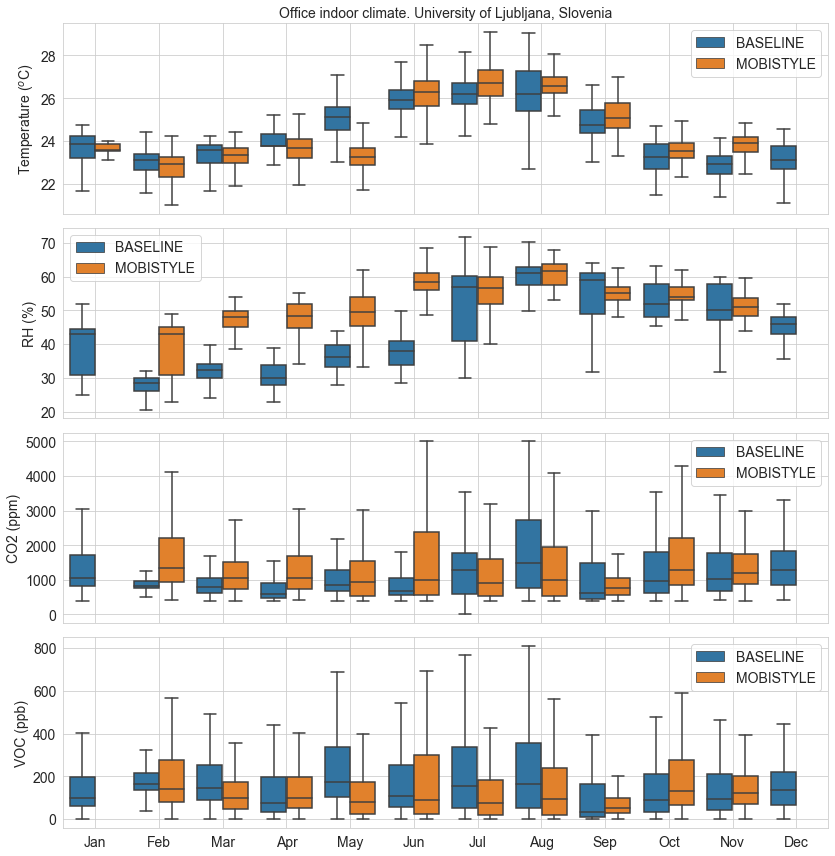

In [14]:
fig, axes = plt.subplots(4,1, figsize=(11.7, 12), sharex=True)

air_cols = ['Temperature', 'RH', 'CO2', 'VOC', 'Outdoor_Temperature', 
            'Outdoor_RH', 'Global_radiation', 'Diffuse_radiation']

for col, ax in zip(air_cols[:4], axes.flat):
    sns.boxplot(data=data, x=data.index.month, y=col, hue='Monitoring_Period',
                showfliers=False, palette=[color_BL, color_MS], ax=ax)
    ax.set_xlabel('', fontsize=14)
    ax.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    ax.xaxis.grid(True)
    
axes[0].set_title('Office indoor climate. University of Ljubljana, Slovenia', fontsize=14)    
axes[0].set_ylabel('Temperature ($^o$C)', fontsize=14)
axes[1].set_ylabel('RH (%)', fontsize=14)
axes[2].set_ylabel('CO2 (ppm)', fontsize=14)
axes[3].set_ylabel('VOC (ppb)', fontsize=14)
plt.tight_layout()

## MOBISTYLE and BASELINE monitoring

During MOBISTYLE period employees:
* are given mobile app (with advices to open window)
* have LED lights installed in the office (signalling high CO2 levels)

### Window data

* Opening count higher for MOBISTYLE (Heating season)
* Time open percentage however is higher for BASELINE (Heating season)

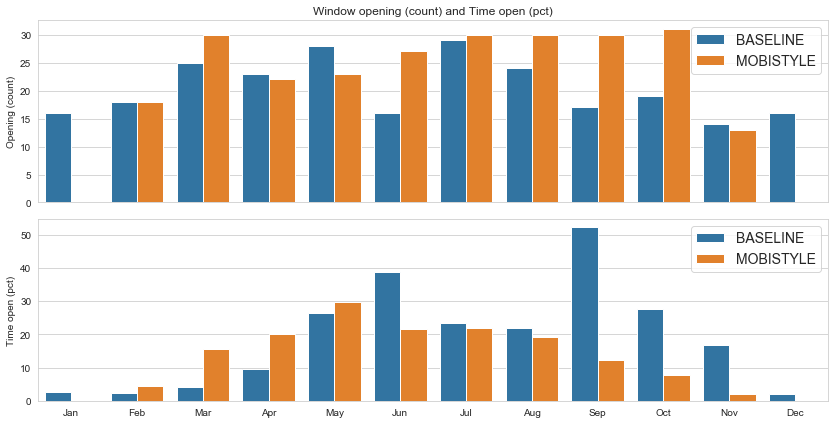

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(11.7, 6), sharex=True)

# Resample montlhy window opening count and average time open
df_OP = df[['Window_State_Change']].resample('MS').apply(lambda x: x.isin([1]).sum())
df_OP['Window_State'] = df[['Window_State']].resample('MS').mean() * 100
df_OP.loc[:'2019-02-1', 'Monitoring_Period'] = 'BASELINE'
df_OP.loc['2019-02-1': , 'Monitoring_Period'] = 'MOBISTYLE' 

# Plot
sns.barplot(data=df_OP, x=df_OP.index.month, y='Window_State_Change', hue='Monitoring_Period',
            palette=pal, ax=ax1);
sns.barplot(data=df_OP, x=df_OP.index.month, y='Window_State', hue='Monitoring_Period',
            palette=pal, ax=ax2);

# Format axes
ax1.set(ylabel='Opening (count)', xlabel='')
ax2.set(ylabel='Time open (pct)', xlabel='')
ax2.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
[ax.legend(loc='upper right', fontsize=14) for ax in (ax1, ax2)]
ax1.set_title('Window opening (count) and Time open (pct)')
plt.tight_layout()

## HEATING and COOLING season
* Comparison based on the winter and summer period
* More time in Category I or Category II = better indoor air quality (IAQ)

### Comfort Categories - Temperature
* BASELINE monitoring has better IAQ in the Cooling season
* Similar time distribution during the Heating season



In [11]:
# Create a function to count categories, return a DataFrame
def stats_category(df, cat_name):
    """
    This f-n calculates time distribution of indoor air parameters in comfort categories 
    and percentage of missing data.
    """
    if cat_name in ('Category_TEMP', 'Category_RH'):
        df_cat = pd.DataFrame(0, index=[cat_name], columns=labels_T_RH + ['Missing data'])
        for cat in labels_T_RH:
            df_cat.loc[cat_name, cat] = df[cat_name].isin([cat]).sum() * 100 / len(df[cat_name])
    else:
        df_cat = pd.DataFrame(0, index=[cat_name], columns=labels_CO2_VOC + ['Missing data'])
        for cat in labels_CO2_VOC:
            df_cat.loc[cat_name, cat] = df[cat_name].isin([cat]).sum() * 100 / len(df[cat_name])    
    df_cat.loc[cat_name, 'Missing data']  = df[cat_name].isna().sum() * 100 / len(df[cat_name])
    
    return df_cat.fillna(0)

# Function to plot text in the middel of horizontal barcharts
# Input params: DataFrame and Axes object
def set_barh_text(df, ax):
    for rowNum, row in enumerate(df.fillna(0.).values):        
        xpos = 0
        for val in row:
            xpos += val
            ax.text(xpos - val/2, rowNum, np.where((val >1.), f'{int(round(val))}', ''), color='white', ha='center', va='center', fontsize=10) 


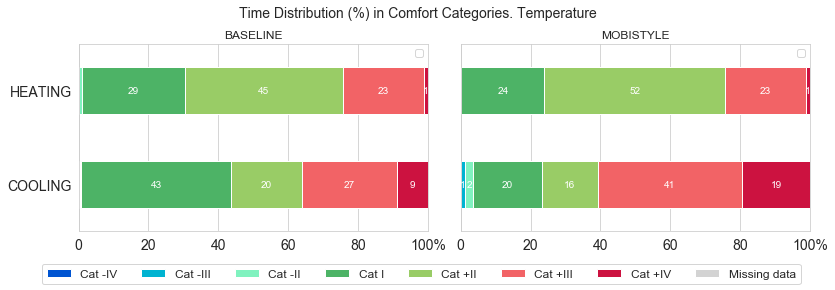

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.7, 4), sharey=True)

# Group comfort catgory data for each period and season
df_cat_T = (data
            .groupby(['Monitoring_Period', 'Season']).apply(stats_category, 'Category_TEMP')
            .reset_index().set_index('Season')
           )
BL_T = df_cat_T.query('Monitoring_Period == "BASELINE"').loc[:, labels_T_RH + ['Missing data']]
MS_T = df_cat_T.query('Monitoring_Period == "MOBISTYLE"').loc[:, labels_T_RH + ['Missing data']]

# Plot
BL_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax1)
MS_T.plot(kind='barh', stacked=True, color=cmap_T_RH, legend='', ax=ax2)

# Add percentage tect to bars
set_barh_text(BL_T, ax1)
set_barh_text(MS_T, ax2)

# Format Axes and Figure
for ax in (ax1, ax2):
    ax.set(xlim=(0,100), xticklabels=[0, 20, 40, 60, 80, '100%'], ylabel='')      
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend('')    
ax1.set_title('BASELINE')
ax2.set_title('MOBISTYLE')    

plt.suptitle(f'Time Distribution (%) in Comfort Categories. Temperature', fontsize=14)

# Add legend
fig.legend(labels_T_RH + ['Missing data'], loc='lower center', bbox_to_anchor=(0.5, 0.0), ncol=8, fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [9]:
#!jupyter nbconvert data_presentation.ipynb --to slides --post serve --template output_toggle